<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_9/g)_Document_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt

In [8]:
# Load a dataset of text documents
dataset = load_dataset("ag_news", split="train")
documents = dataset['text'][:1000]  # Use a subset for quicker execution

In [9]:
print(f"Loaded {len(documents)} documents")

Loaded 1000 documents


In [10]:
# Generate embeddings using SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
print("Generating embeddings...")
embeddings = model.encode(documents, show_progress_bar=True)

Generating embeddings...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [11]:
print(f"Generated embeddings of shape: {embeddings.shape}")

Generated embeddings of shape: (1000, 384)


In [12]:
# Perform clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


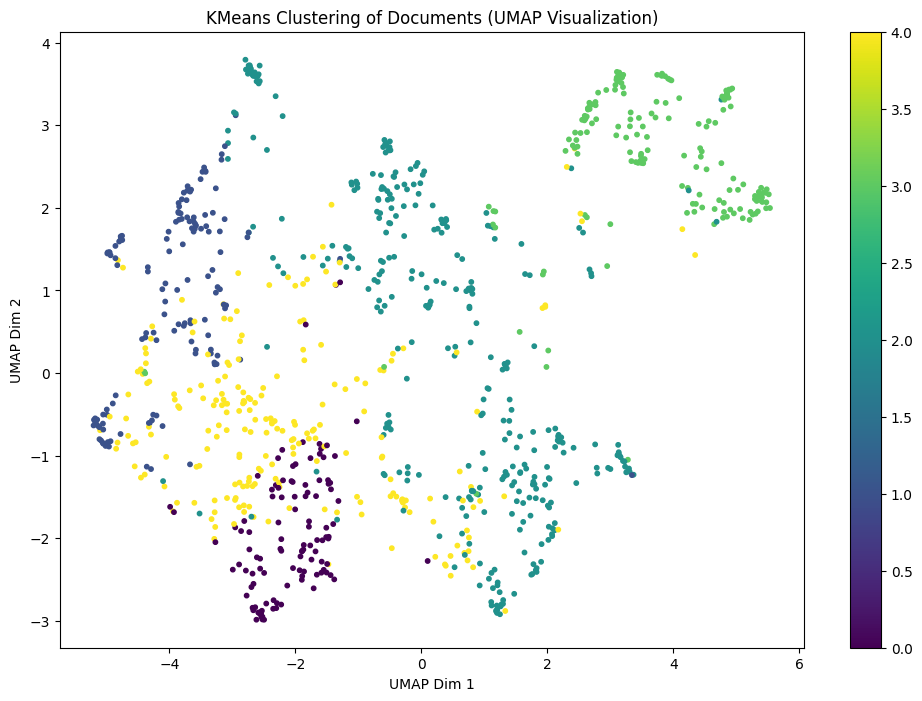

In [15]:
# Visualize results using UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_embeddings = umap_reducer.fit_transform(embeddings)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.colorbar(scatter)
plt.title("KMeans Clustering of Documents (UMAP Visualization)")
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")
plt.show()
